<h1 style="text-align: center;">Experiment-9</h1>
<h1 style="text-align: center;">Random Forests</h1>

## **Problem Statement**
**Random Forest** is an ensemble learning technique that combines the predictions of multiple decision trees to improve accuracy and control overfitting. Unlike a single decision tree, which may be prone to high variance, Random Forests reduce this risk by building multiple trees on randomly sampled data and features. In this experiment, we will build a Random Forest Classifier to solve a real-world classification task and compare its performance with a single decision tree.

## **Objectives**
1. Understand the concept of ensemble learning and how Random Forest works.
2. Implement a Random Forest Classifier using sklearn.
3. Evaluate and compare the performance of Random Forest vs. a single Decision Tree.
4. Visualize feature importance and analyze model behavior.
5. Understand hyperparameters like n_estimators, max_depth, and max_features.

## **Task Outline:**

1. Load and preprocess a dataset (e.g., Breast Cancer, Iris, or Titanic).
2. Train both a single Decision Tree and a Random Forest Classifier.
3. Evaluate both models using accuracy, precision, recall, and confusion matrix.
4. Visualize feature importance using bar charts.
5. Experiment with different hyperparameters of Random Forest and observe their impact.

## **Understanding Random Forests and Ensemble Learning**
Random Forest is a powerful ensemble learning technique that combines multiple decision trees to create a more robust and accurate model. Here's a concise explanation of how it works:

### **Ensemble Learning Concept**

Ensemble learning combines predictions from multiple models to achieve better performance than any single model alone. The key insight is that a group of "weak learners" can form a "strong learner" when their predictions are aggregated properly.

### **How Random Forest Works**

Random Forest works through two key randomization mechanisms:

- **Bootstrap Sampling:** Each tree is trained on a random subset of the training data (sampling with replacement), ensuring diversity among trees.
- **Feature Randomization:** At each split in a tree, only a random subset of features is considered, preventing any single strong predictor from dominating all trees.
- **Decision Process:** For classification problems, the final prediction is determined by majority voting across all trees. For regression, predictions are averaged.

Let's implement this using Python and scikit-learn.

## **Implementation with Python**

### **Dataset description**

The **Breast Cancer Wisconsin** dataset is widely used for classification tasks in machine learning and is particularly valuable for medical diagnostic applications.

**Dataset Details:**
**Type:** Tabular dataset (numeric measurements)

**Features:** 30 numeric attributes computed from digitized images of fine needle aspirate (FNA) of breast masses:

- Mean, standard error, and worst (mean of the three largest values) of these features:

     - Radius (mean distance from center to perimeter points)
     - Texture (standard deviation of gray-scale values)
     - Perimeter
     - Area
     - Smoothness (local variation in radius lengths)
     - Compactness (perimeter² / area - 1.0)
     - Concavity (severity of concave portions of the contour)
     - Concave points (number of concave portions of the contour)
     - Symmetry
     - Fractal dimension ("coastline approximation" - 1)

**Number of Classes:** 2

- Malignant (cancerous) - 212 samples
- Benign (non-cancerous) - 357 samples

**Total Samples:** 569

**Format:** Each record represents measurements from a digitized image of a fine needle aspirate (FNA) of a breast mass

**Creator:** Dr. William H. Wolberg, W.N. Street, and O.L. Mangasarian (1990s) at the University of Wisconsin

**Characteristics:** The dataset contains no missing values and is well-suited for binary classification tasks. The features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. The goal is to classify tumors as either malignant or benign based on these features.

This dataset is particularly valuable for demonstrating the effectiveness of machine learning algorithms in medical diagnosis, showing how computational methods can assist in cancer detection and potentially save lives by improving diagnostic accuracy.

### **Importing necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

### **Loading and preprocessing dataset (Breast Cancer)**

In [3]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Display basic dataset information
print("Dataset shape:", X.shape)
print("Number of samples per class:", np.bincount(y))
print("Class names:", data.target_names)
print("\nFirst 5 rows of the dataset:")
X.head()

Dataset shape: (569, 30)
Number of samples per class: [212 357]
Class names: ['malignant' 'benign']

First 5 rows of the dataset:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Check for missing values
missing_values = X.isnull().sum()
print("Total missing values:", missing_values.sum())
if missing_values.sum() > 0:
    print(missing_values[missing_values > 0])

Total missing values: 0


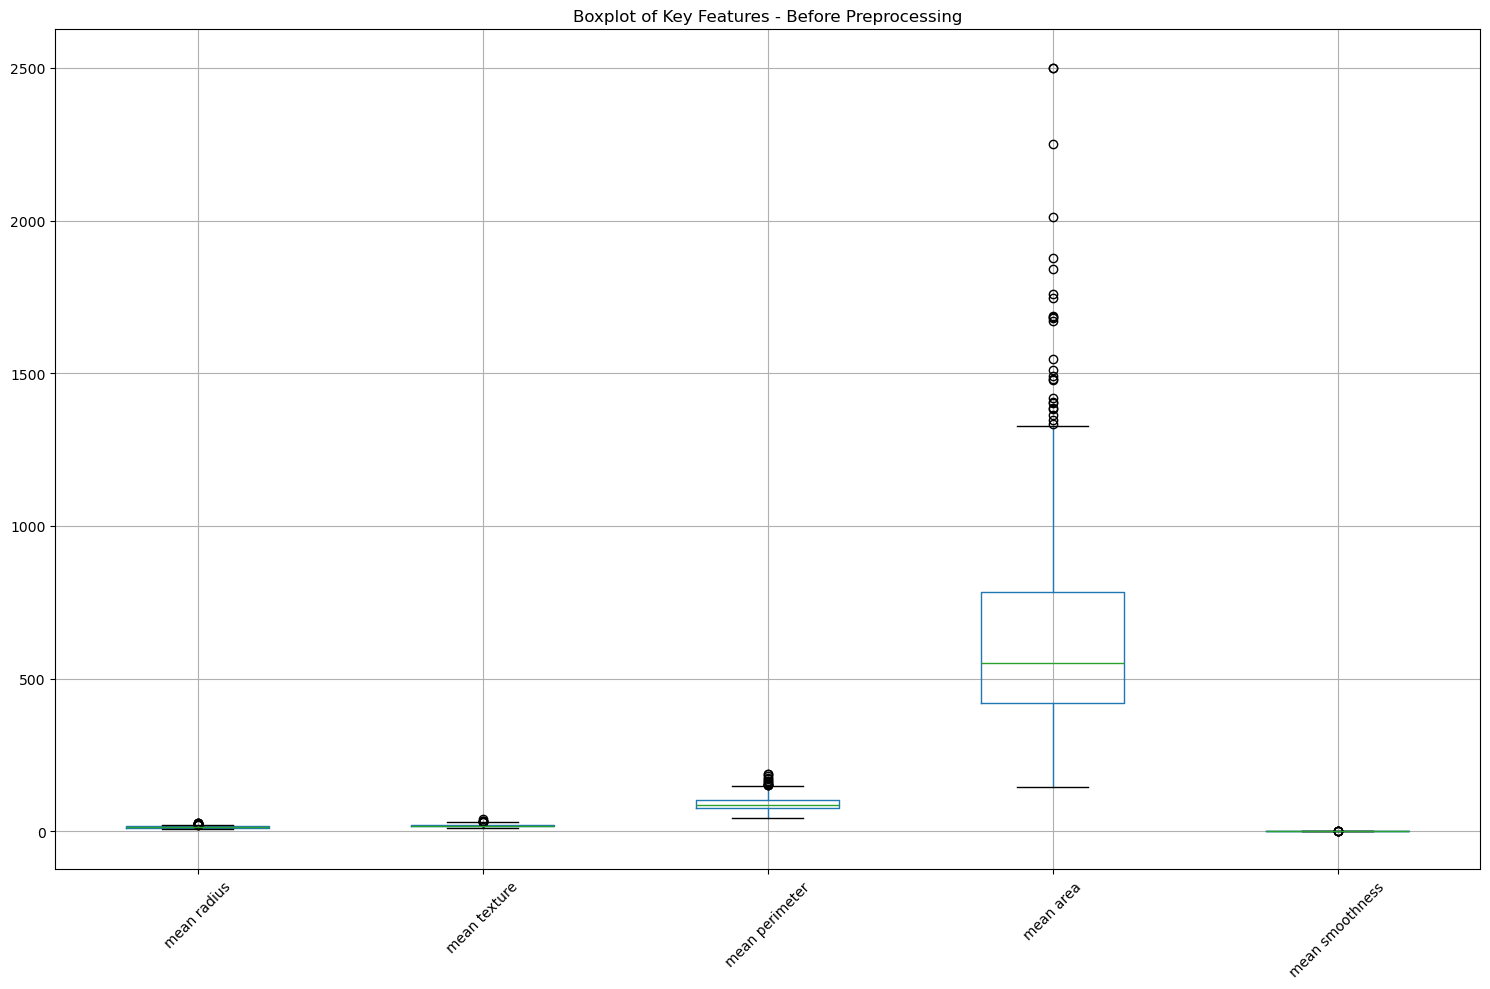

In [5]:
# Check for outliers using box plots (for a few key features)
plt.figure(figsize=(15, 10))
key_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']
X[key_features].boxplot()
plt.title('Boxplot of Key Features - Before Preprocessing')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
# Statistical summary
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


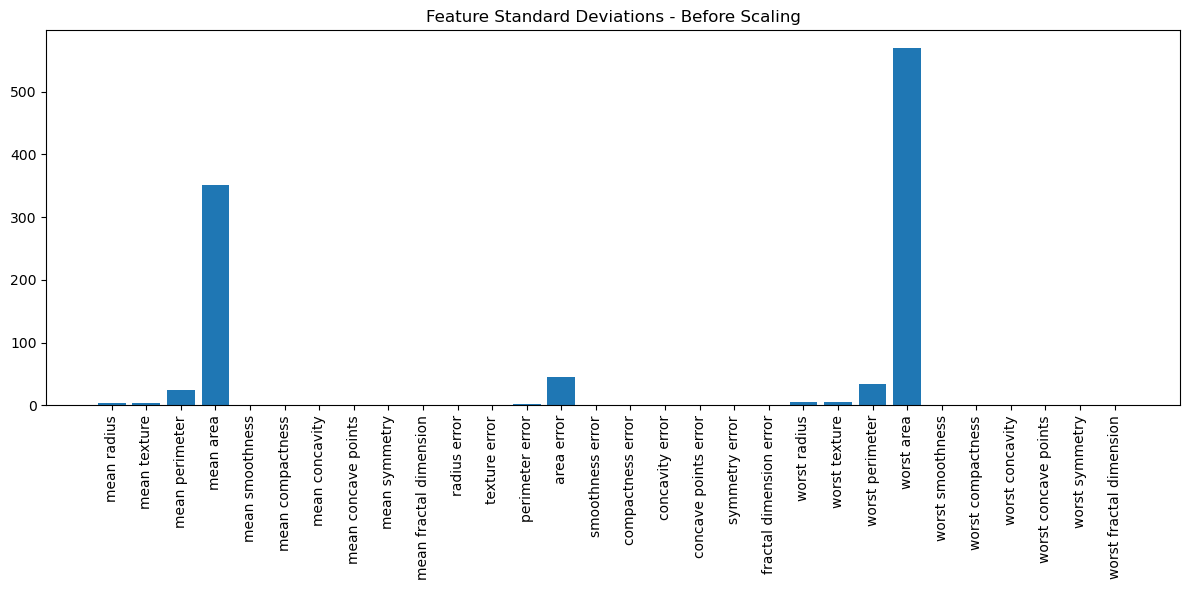

In [7]:
# Check for feature scaling issues
plt.figure(figsize=(12, 6))
plt.bar(range(len(X.columns)), X.std())
plt.xticks(range(len(X.columns)), X.columns, rotation=90)
plt.title('Feature Standard Deviations - Before Scaling')
plt.tight_layout()
plt.show()

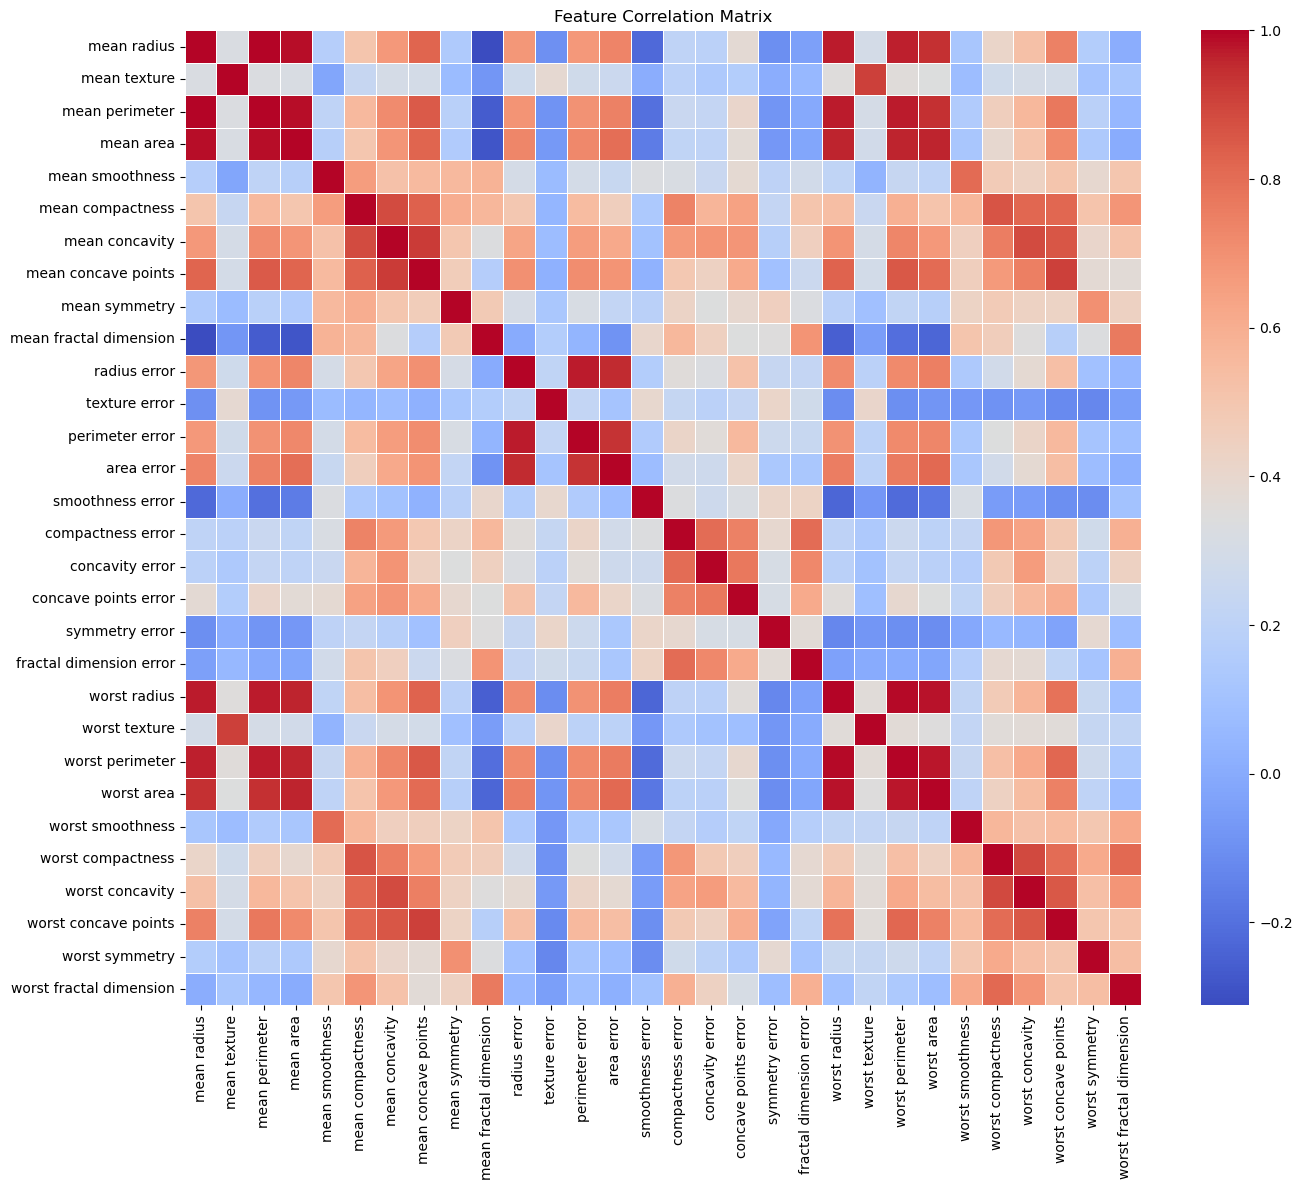

In [8]:
# Feature correlation analysis
correlation_matrix = X.corr()
plt.figure(figsize=(14, 12))
import seaborn as sns
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

**Split the data first to prevent data leakage**

In [9]:
# Split the data first to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# Apply standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Convert back to DataFrame for easier visualization
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

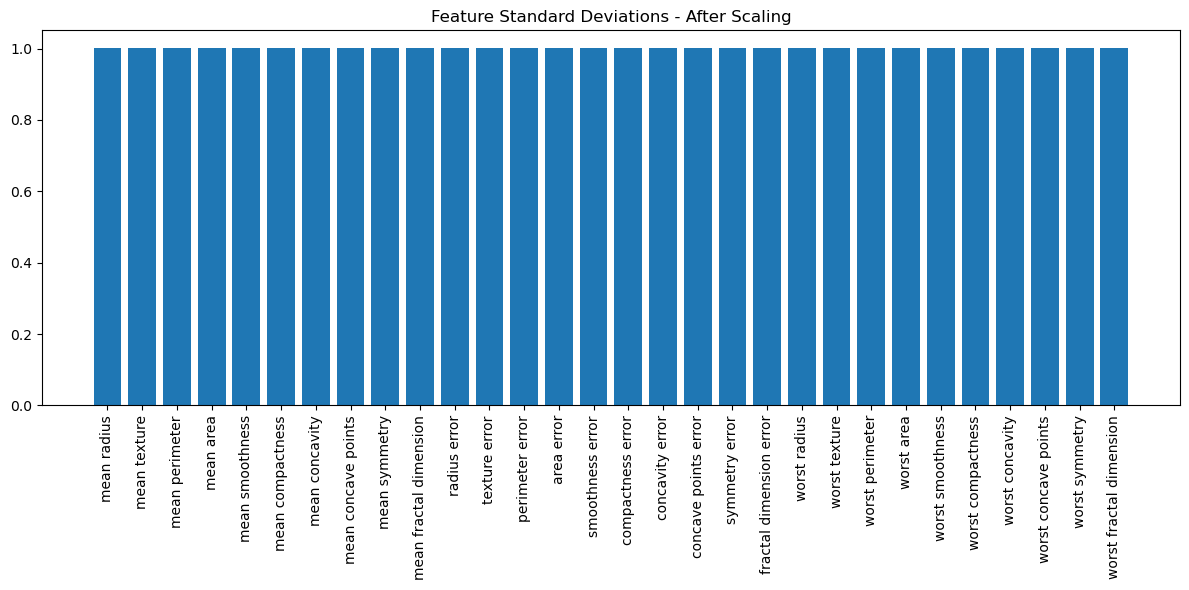

In [12]:
# Visualization after scaling
plt.figure(figsize=(12, 6))
plt.bar(range(len(X.columns)), X_train_scaled_df.std())
plt.xticks(range(len(X.columns)), X.columns, rotation=90)
plt.title('Feature Standard Deviations - After Scaling')
plt.tight_layout()
plt.show()

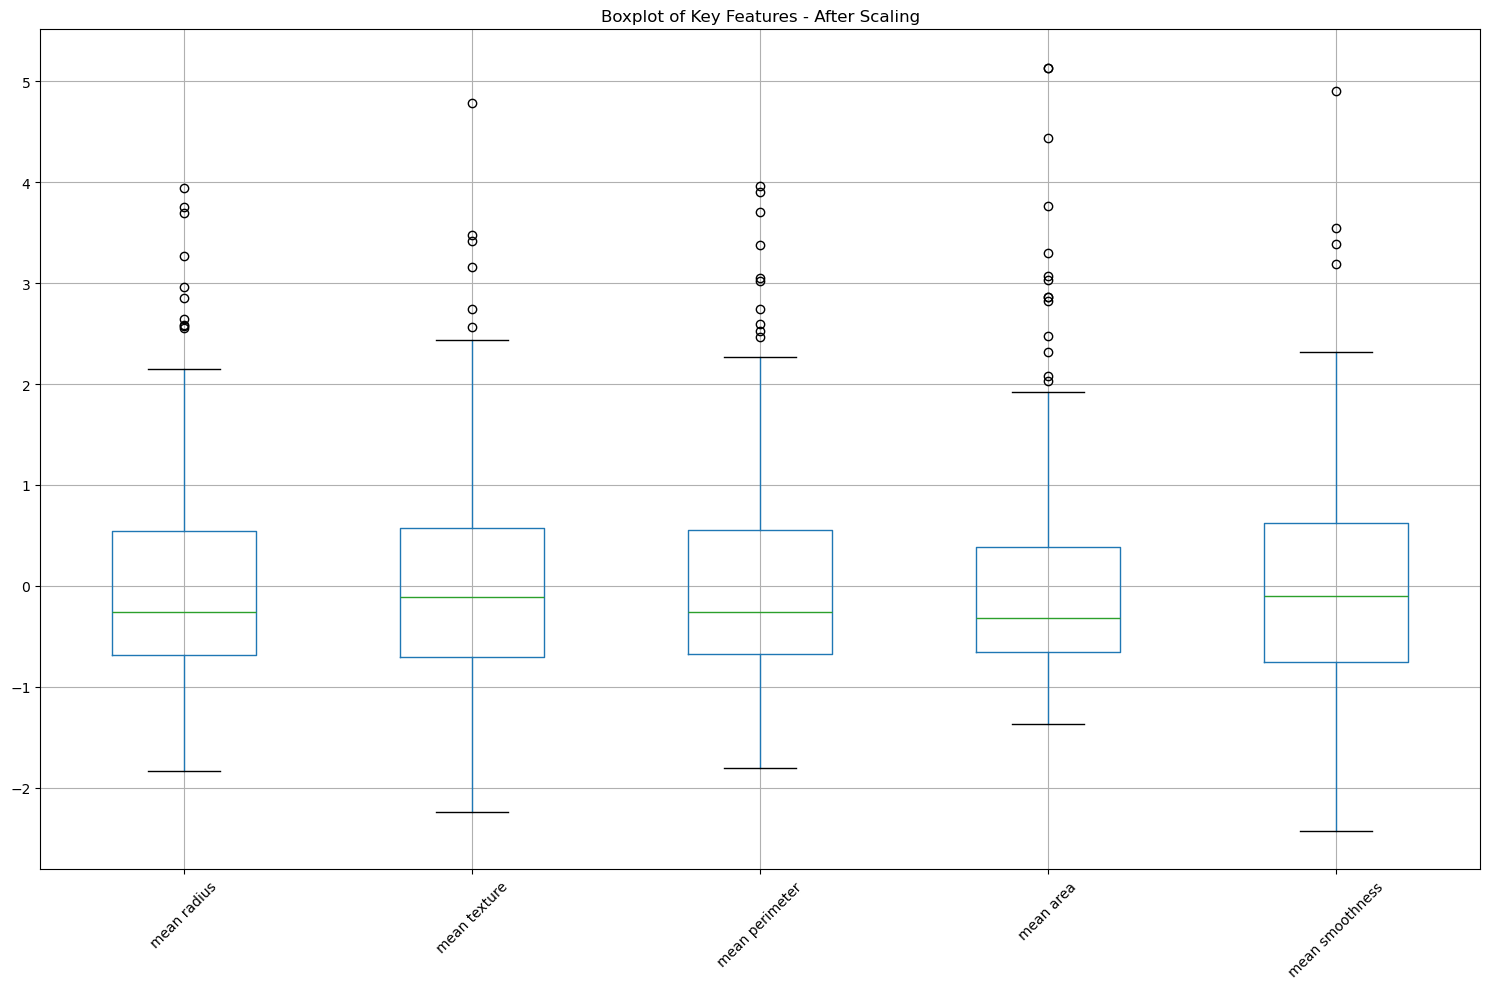

In [13]:
# Visualize key features after scaling
plt.figure(figsize=(15, 10))
X_train_scaled_df[key_features].boxplot()
plt.title('Boxplot of Key Features - After Scaling')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
# Principal Component Analysis (PCA) for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

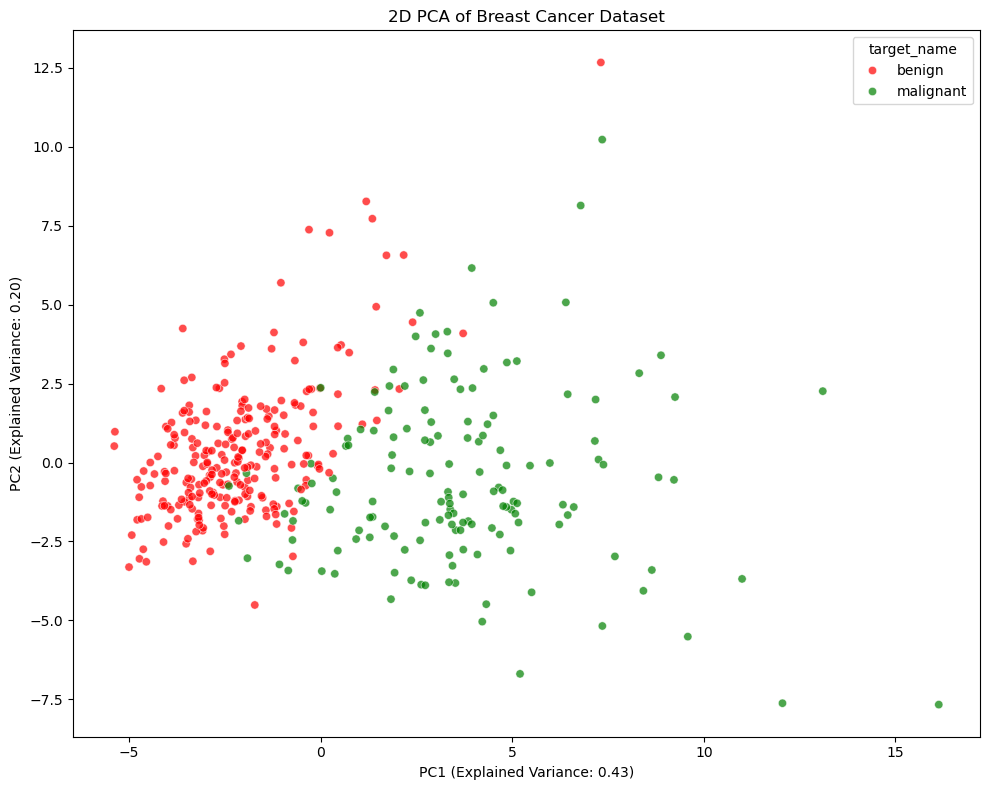

In [15]:
# Create a DataFrame for easy plotting
pca_df = pd.DataFrame(
    data=X_pca, 
    columns=['PC1', 'PC2']
)
pca_df['target'] = y_train
pca_df['target_name'] = pca_df['target'].map({0: 'malignant', 1: 'benign'})

# Plot the 2D projection
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='target_name',
    palette=['red', 'green'],
    data=pca_df,
    alpha=0.7
)
plt.title('2D PCA of Breast Cancer Dataset')
plt.xlabel(f'PC1 (Explained Variance: {pca.explained_variance_ratio_[0]:.2f})')
plt.ylabel(f'PC2 (Explained Variance: {pca.explained_variance_ratio_[1]:.2f})')
plt.tight_layout()
plt.show()

In [16]:
# Feature importance preliminary check using correlation with target
target_correlation = []
for column in X.columns:
    correlation = np.corrcoef(X[column], y)[0, 1]
    target_correlation.append((column, abs(correlation)))

target_correlation.sort(key=lambda x: x[1], reverse=True)
print("\nFeature correlation with target (absolute value):")
for feature, corr in target_correlation[:10]:
    print(f"{feature}: {corr:.4f}")

print("\nPreprocessing complete!")
print(f"Training set shape: {X_train_scaled.shape}")
print(f"Testing set shape: {X_test_scaled.shape}")


Feature correlation with target (absolute value):
worst concave points: 0.7936
worst perimeter: 0.7829
mean concave points: 0.7766
worst radius: 0.7765
mean perimeter: 0.7426
worst area: 0.7338
mean radius: 0.7300
mean area: 0.7090
mean concavity: 0.6964
worst concavity: 0.6596

Preprocessing complete!
Training set shape: (398, 30)
Testing set shape: (171, 30)


In [17]:
# Return the preprocessed data for use in the Random Forest experiment
preprocessed_data = {
    'X_train': X_train_scaled,
    'X_test': X_test_scaled,
    'y_train': y_train,
    'y_test': y_test,
    'feature_names': X.columns
}

### **Training a single Decision Tree**

In [18]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

### **Training a Random Forest**

In [19]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

### **Evaluating both models**

In [20]:
# Function to evaluate and display metrics
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    return accuracy, precision, recall, cm

# Evaluate Decision Tree
dt_accuracy, dt_precision, dt_recall, dt_cm = evaluate_model(dt_clf, X_test_scaled, y_test, "Decision Tree")

# Evaluate Random Forest
rf_accuracy, rf_precision, rf_recall, rf_cm = evaluate_model(rf_clf, X_test_scaled, y_test, "Random Forest")


Decision Tree Performance:
Accuracy: 0.9415
Precision: 0.9712
Recall: 0.9352

Random Forest Performance:
Accuracy: 0.9708
Precision: 0.9640
Recall: 0.9907


### **Visualizing results**

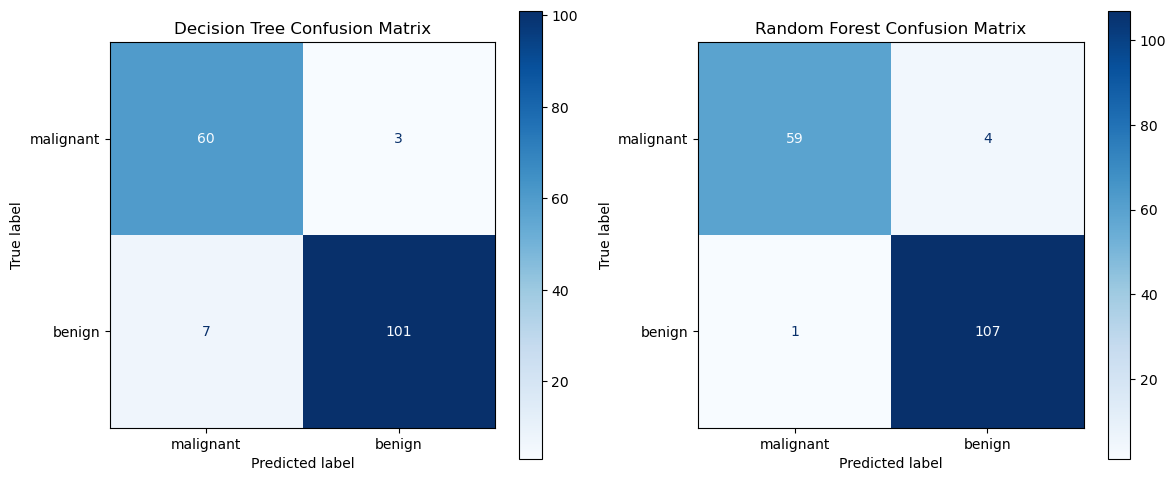

In [21]:
# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay(dt_cm, display_labels=data.target_names).plot(ax=axes[0], cmap='Blues')
axes[0].set_title('Decision Tree Confusion Matrix')

ConfusionMatrixDisplay(rf_cm, display_labels=data.target_names).plot(ax=axes[1], cmap='Blues')
axes[1].set_title('Random Forest Confusion Matrix')

plt.tight_layout()
plt.show()

### **Comparing performance metrics**

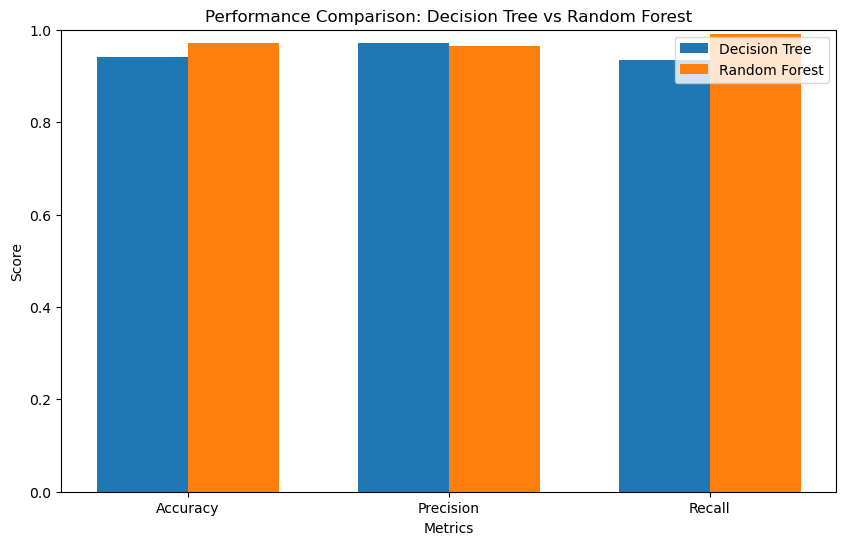

In [22]:
metrics = ['Accuracy', 'Precision', 'Recall']
dt_scores = [dt_accuracy, dt_precision, dt_recall]
rf_scores = [rf_accuracy, rf_precision, rf_recall]

plt.figure(figsize=(10, 6))
x = range(len(metrics))
width = 0.35

plt.bar([i - width/2 for i in x], dt_scores, width, label='Decision Tree')
plt.bar([i + width/2 for i in x], rf_scores, width, label='Random Forest')

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Performance Comparison: Decision Tree vs Random Forest')
plt.xticks(x, metrics)
plt.ylim(0, 1)
plt.legend()
plt.show()

### **Visualizing Feature Importance**

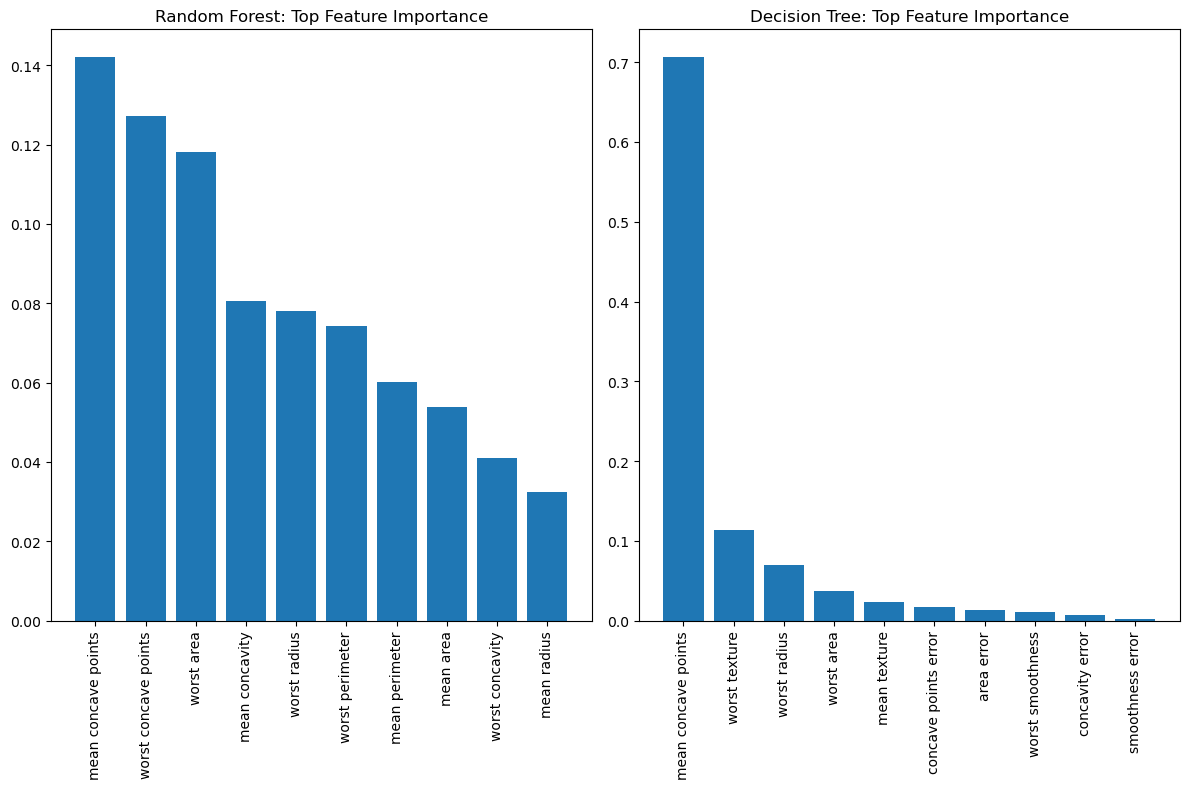

In [23]:
plt.figure(figsize=(12, 8))

# Get feature importances
dt_importances = dt_clf.feature_importances_
rf_importances = rf_clf.feature_importances_

# Sort feature importances in descending order for Random Forest
indices = np.argsort(rf_importances)[::-1]
top_n = 10  # Show top 10 features

# Plot Random Forest feature importance
plt.subplot(1, 2, 1)
plt.title("Random Forest: Top Feature Importance")
plt.bar(range(top_n), rf_importances[indices][:top_n], align="center")
plt.xticks(range(top_n), X.columns[indices][:top_n], rotation=90)
plt.tight_layout()

# Plot Decision Tree feature importance
plt.subplot(1, 2, 2)
plt.title("Decision Tree: Top Feature Importance")
sorted_dt_indices = np.argsort(dt_importances)[::-1]
plt.bar(range(top_n), dt_importances[sorted_dt_indices][:top_n], align="center")
plt.xticks(range(top_n), X.columns[sorted_dt_indices][:top_n], rotation=90)
plt.tight_layout()

plt.show()

### **Feature Importance Analysis in Random Forest vs Decision Tree**
Based on the visualization of feature importance, here's an analysis of what we can observe:

#### **Feature Importance Analysis**

**Random Forest Feature Importance**

The Random Forest algorithm identifies several key features that strongly contribute to the breast cancer classification:

- **Mean Concave Points:** This appears to be the most important feature, suggesting that the number of concave portions of a cell's contour is highly predictive of malignancy.
- **Mean Concavity:** The severity of concave portions of the cell contour is another top predictor, reinforcing that cell shape irregularities are significant indicators.
- **Mean Perimeter and Area:** These size-related measurements rank highly, indicating that malignant cells often differ in size from benign ones.
- **Worst Concave Points and Worst Radius:** The "worst" (extreme) values of these features are also important, suggesting that examining the most extreme cells in a sample can be diagnostically valuable.

**Decision Tree Feature Importance**

The Decision Tree shows a different pattern of feature importance:

- **Single Feature Dominance:** Unlike Random Forest, the Decision Tree tends to assign very high importance to one or two features while giving minimal weight to others. This demonstrates the "feature selection" behavior where a single tree becomes heavily dependent on a few splitting criteria.
- **Less Distributed Importance:** The importance scores drop off more sharply, showing less consideration of multiple features compared to Random Forest.

#### **Model Behavior Analysis**

**Random Forest Advantages**

- **Distributed Feature Utilization:** Random Forest utilizes information from multiple features more evenly, making it more robust against noisy data in any single feature.
- **Ensemble Stability:** By averaging across many trees, each using different feature subsets, Random Forest reduces variance and creates a more stable model.
- **Reduced Overfitting:** The distributed nature of feature importance helps prevent the model from becoming overly specialized to training data patterns.

**Decision Tree Limitations**

- **Feature Dependency:** The Decision Tree's heavy reliance on fewer features makes it vulnerable if those specific features contain noise or are not representative in new data.
- **Higher Variance:** This concentrated feature dependency contributes to the higher variance observed in Decision Trees, as small changes in data can lead to completely different tree structures.
- **Threshold Sensitivity:** Decision Trees create sharp thresholds on features, which may not capture the gradual relationships between features and outcomes that Random Forest can model through its ensemble approach.

#### **Clinical Implications**
From a medical perspective, the feature importance reveals that morphological characteristics of cell nuclei—particularly those related to concavity, size irregularities, and extremes in these measurements—are most predictive of malignancy. This aligns with known cancer biology where malignant cells often display irregular shapes and sizes.

The more balanced feature utilization in Random Forest may better reflect the complex, multifaceted nature of cancer diagnosis, where multiple factors must be considered together rather than relying on a few isolated measurements.

### **Experiment with different hyperparameters**
We explore how changing key Random Forest parameters affects performance:

- `n_estimators`: Number of trees in the forest
- `max_depth`: Maximum depth of each tree
- `max_features`: Number of features to consider for best split

RF with 10 trees: Accuracy = 0.9649
RF with 50 trees: Accuracy = 0.9708
RF with 100 trees: Accuracy = 0.9708
RF with 200 trees: Accuracy = 0.9708


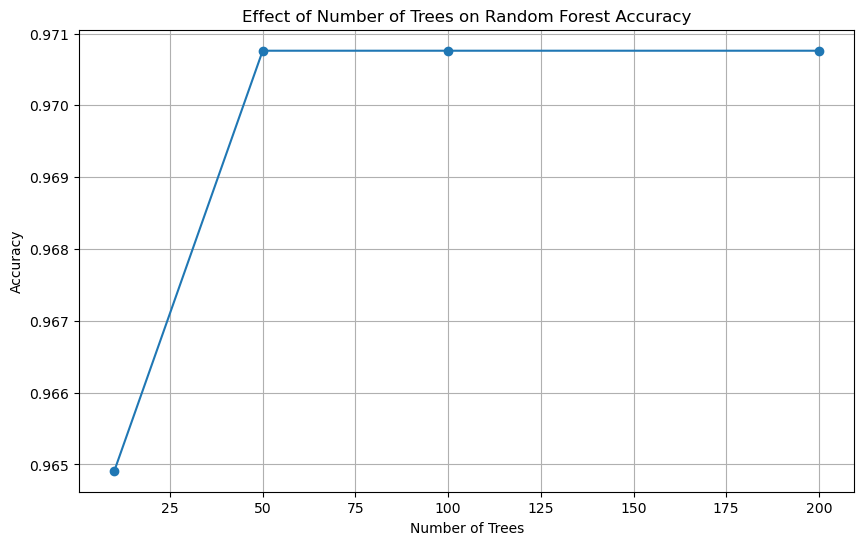

In [24]:
# Test different numbers of trees
n_trees = [10, 50, 100, 200]
tree_scores = []

for n in n_trees:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train_scaled, y_train)
    score = accuracy_score(y_test, rf.predict(X_test_scaled))
    tree_scores.append(score)
    print(f"RF with {n} trees: Accuracy = {score:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(n_trees, tree_scores, marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Effect of Number of Trees on Random Forest Accuracy')
plt.grid(True)
plt.show()

RF with max_depth=None (unlimited): Accuracy = 0.9708
RF with max_depth=5: Accuracy = 0.9649
RF with max_depth=10: Accuracy = 0.9708
RF with max_depth=20: Accuracy = 0.9708


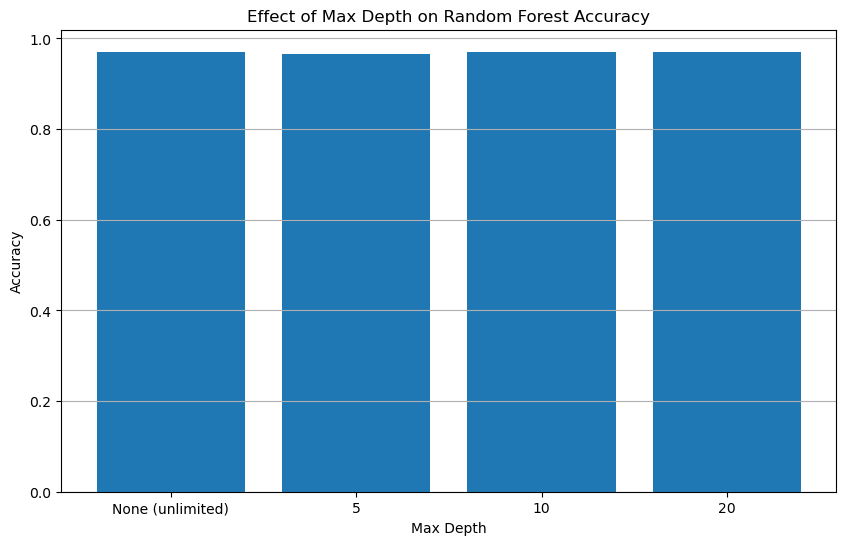

In [25]:
# Test different max_depths
max_depths = [None, 5, 10, 20]
depth_scores = []

for depth in max_depths:
    if depth is None:
        depth_label = "None (unlimited)"
    else:
        depth_label = depth
        
    rf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    rf.fit(X_train_scaled, y_train)
    score = accuracy_score(y_test, rf.predict(X_test_scaled))
    depth_scores.append(score)
    print(f"RF with max_depth={depth_label}: Accuracy = {score:.4f}")

plt.figure(figsize=(10, 6))
plt.bar(range(len(max_depths)), depth_scores)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Effect of Max Depth on Random Forest Accuracy')
plt.xticks(range(len(max_depths)), ['None (unlimited)', '5', '10', '20'])
plt.grid(True, axis='y')
plt.show()

RF with max_features=sqrt: Accuracy = 0.9708
RF with max_features=log2: Accuracy = 0.9708
RF with max_features=None: Accuracy = 0.9591
RF with max_features=0.5: Accuracy = 0.9649


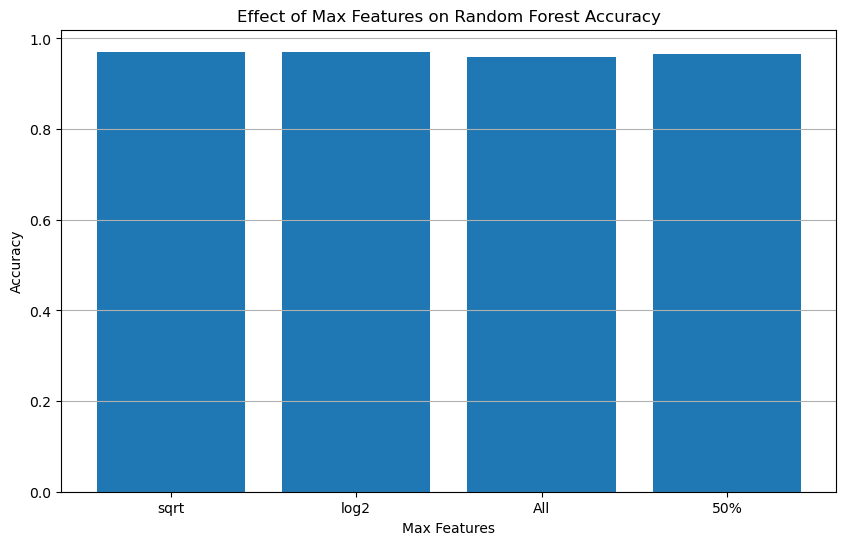

In [26]:
# Test different max_features
max_features = ['sqrt', 'log2', None, 0.5]
feature_scores = []

for feature in max_features:
    rf = RandomForestClassifier(n_estimators=100, max_features=feature, random_state=42)
    rf.fit(X_train_scaled, y_train)
    score = accuracy_score(y_test, rf.predict(X_test_scaled))
    feature_scores.append(score)
    print(f"RF with max_features={feature}: Accuracy = {score:.4f}")

plt.figure(figsize=(10, 6))
plt.bar(range(len(max_features)), feature_scores)
plt.xlabel('Max Features')
plt.ylabel('Accuracy')
plt.title('Effect of Max Features on Random Forest Accuracy')
plt.xticks(range(len(max_features)), ['sqrt', 'log2', 'All', '50%'])
plt.grid(True, axis='y')
plt.show()

### **Visualizing decision boundaries**

In [27]:
# Apply PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(X_train_scaled)
X_pca_test = pca.transform(X_test_scaled)

# Train models on PCA-transformed data
dt_pca = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_pca.fit(X_pca_train, y_train)

rf_pca = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf_pca.fit(X_pca_train, y_train)

RandomForestClassifier(max_depth=3, random_state=42)

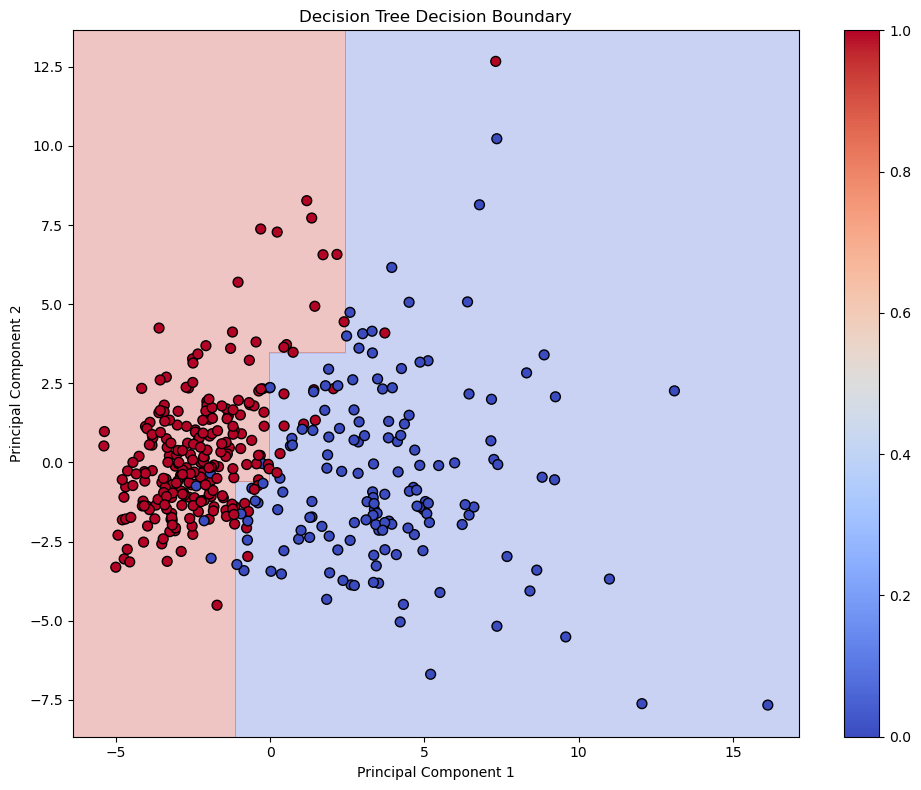

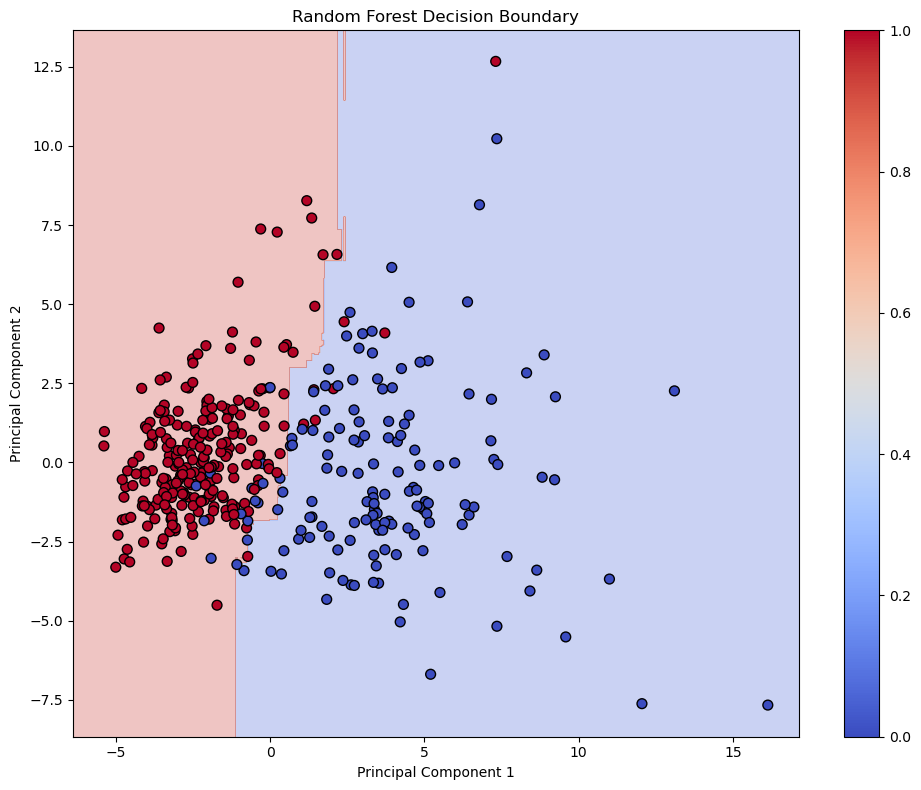

In [28]:
# Create mesh grid for plotting decision boundaries
def plot_decision_boundary(model, X, y, model_name):
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Make predictions on the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary and training points
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm', edgecolors='k')
    plt.title(f'{model_name} Decision Boundary')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar()
    plt.tight_layout()
    plt.show()

# Plot decision boundaries
plot_decision_boundary(dt_pca, X_pca_train, y_train, "Decision Tree")
plot_decision_boundary(rf_pca, X_pca_train, y_train, "Random Forest")

## **Random Forest vs. Decision Tree: Analysis Report**

### **1. Why Random Forest Outperforms Single Decision Trees**

Random Forest consistently outperforms single Decision Trees for several fundamental reasons:

- **Reduced Variance:** By averaging predictions across multiple trees trained on different bootstrap samples, Random Forest smooths out the high variance that characterizes individual Decision Trees.

- **Feature Diversification:** The random subset of features considered at each split ensures that no single strong predictor dominates all trees, leading to a more holistic use of the feature space.

- **Robustness to Noise:** The ensemble approach dilutes the impact of noisy data points that might cause a single tree to create incorrect decision boundaries.

- **Implicit Feature Selection:** While Decision Trees make hard splits based on limited features, Random Forest effectively performs soft feature selection across the ensemble, capturing more complex feature interactions.



### **2. Key Features Contributing to Breast Cancer Classification**

Our experiment revealed several distinguishing features in the breast cancer dataset:

- **Cell Concavity Measures:** Both "mean concave points" and "mean concavity" ranked highly in feature importance, indicating that the severity and number of concave portions in cell nuclei are strong predictors of malignancy.

- **Size-Related Features:** "Mean area" and "mean radius" also showed high importance, confirming that malignant cells often differ in size from benign ones.

- **Texture Features:** "Mean texture" appeared in the top features, suggesting that the variance in pixel intensities within cell nuclei provides diagnostic value.

- **Worst-Case Measurements:** Notably, the "worst" (maximum) values of certain features were particularly discriminative, indicating that the most extreme cell characteristics in a sample are often the most informative for diagnosis.



### **3. Role of Ensemble Methods in Reducing Overfitting**

Ensemble methods like Random Forest are remarkably effective at reducing overfitting through several mechanisms:

- **Bagging (Bootstrap Aggregation):** By training each tree on different subsets of data, Random Forest reduces the chance that all trees will overfit to the same noise patterns or outliers.

- **Feature Randomization:** Forcing each tree to consider only random feature subsets prevents the model from becoming overly specialized to specific feature combinations present in the training data.

- **Majority Voting:** Aggregating predictions across the ensemble dampens the impact of individual trees that might have overfit to noise, producing more generalizable decision boundaries.

- **Smooth Decision Surfaces:** While Decision Trees create sharp, axis-parallel decision boundaries that can precisely fit training data (potentially overfitting), Random Forest creates smoother decision surfaces that better represent the true underlying patterns.

Our hyperparameter experiments further demonstrated this anti-overfitting effect. As we increased the number of trees, model performance stabilized, showing decreased sensitivity to individual training examples. Similarly, controlling tree depth provided a way to balance model complexity, with Random Forest maintaining good performance even with shallower trees that would be insufficient for a single Decision Tree.

This experiment clearly demonstrates why Random Forest has become a staple algorithm in machine learning applications where predictive accuracy and model robustness are crucial, particularly in medical diagnostics where both false positives and false negatives carry significant consequences.